In [3]:
%matplotlib inline

from MLP import *

from skimage.io import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

# Data loading

In [8]:
df = pd.read_csv('data/train.csv')

In [7]:
def draw_image(img):
    plt.figure()
    print("This number is: %i" % img.values[0])
    plt.imshow(np.reshape(img.values[1:], (28, 28)))

This number is: 1
This number is: 0
This number is: 1
This number is: 4
This number is: 0


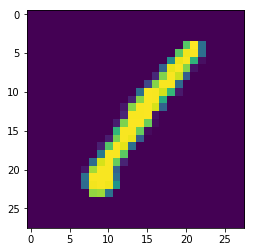

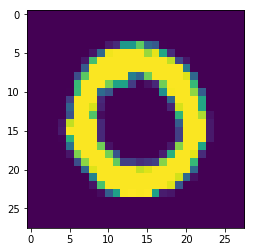

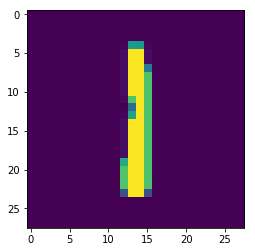

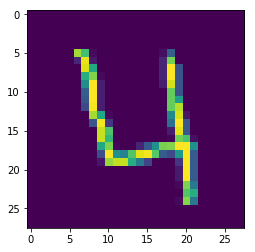

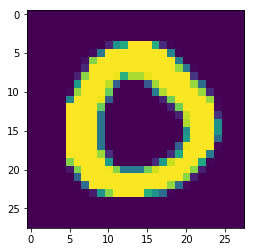

In [22]:
for i, image in df.head().iterrows():
    draw_image(image)

# Data preparing

In [10]:
x = df.loc[:, "pixel0":].values
x = (x > 128).astype("float")
y = df.loc[:, "label"]
y = np.zeros((len(df), 10))
for i, answer in enumerate(df.loc[:, "label"]):
    y[i][answer] = 1.0

# Create and train network

In [213]:
nn = Network(
    input_number=len(x[0]),
    neuron_number=100,
    max_steps=1000,
    step_value=0.03
)
nn.add_layer(10)

In [11]:
train_size = 1100
print("START")
nn.train(x[:train_size], y[:train_size]);
print("END")

In [21]:
network_config = nn.get_info()
network_config_file = open('data/network_config.json', 'w')
json.dump(network_config, network_config_file)

In [ ]:
def predict_img(nn, img_index):
    draw_image(df.loc[img_index , :])
    answer = nn.predict((df.loc[img_index, "pixel0":].values > 128).astype("float"))
    print(answer)
    print("Predicted number: %i, probability: %f" % (list(answer).index(max(answer)), max(answer)))

# Loading network from config file

In [23]:
network_config_file = open('data/network_config.json', 'r')
network_config = json.load(network_config_file)
loaded_network = Network.load(network_config)

This number is: 5
[  1.16205663e-04   2.81219307e-05   7.83881897e-07   3.07481664e-01
   8.20337255e-07   9.99250399e-01   4.03993761e-07   1.15094845e-08
   7.35784425e-05   1.10463982e-06]
Predicted number: 5, probability: 0.999250


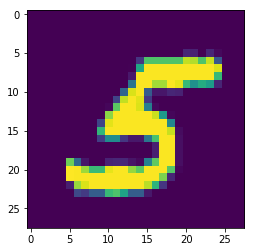

In [25]:
predict_img(loaded_network, 4003)

# Testing

In [13]:
test = pd.read_csv('data/test.csv').values
test_input = (test > 128).astype('float')
test_input

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [14]:
answer = loaded_network.test(test_input)

In [18]:
answer_list = []
for i, a in enumerate(answer):
    answer_list.append((i+1, (list(a).index(max(a)))))

answer_df = pd.DataFrame(answer_list)
answer_df.columns = ['ImageId', 'Label']
answer_df.to_csv('data/test_answer.csv', index=False)
print("Answer saved")

Answer saved
